# Loan Status Classification

- Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.

- **Business Problem :-**
The bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.


- **Business Objective :-**
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application.


- **Machine learning can be used to predict the creditworthiness of home loan applicants with a high degree of accuracy.
- The use of machine learning to assess creditworthiness will reduce the time it takes to process applications and improve the overall efficiency of the loan application process.
- Providing an immediate response to applicants will increase customer satisfaction and improve the bank's reputation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm,skew

In [2]:
df= pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Checking for Nan/ Missing Value/ Duplicate Value

In [4]:
df.duplicated().sum() #non duplicate value

0

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

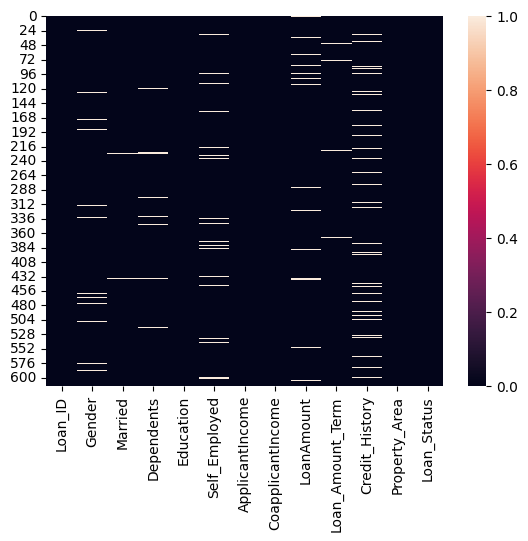

In [6]:
sns.heatmap(df.isnull())

## Filling Nan values

In [7]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [8]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<AxesSubplot: >

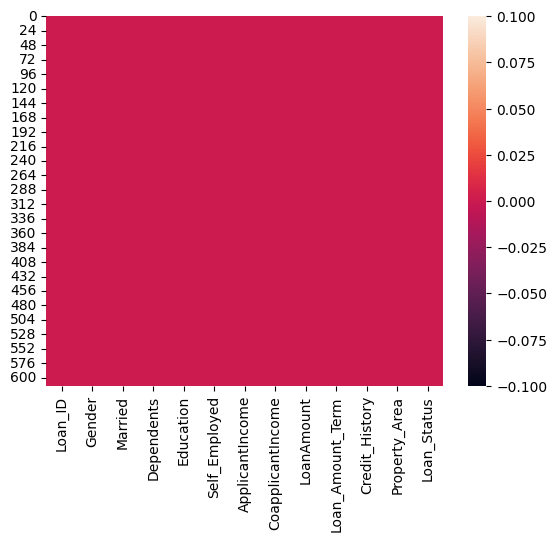

In [9]:
sns.heatmap(df.isnull())

- This full-red heatmap shows there are no missing values.

## Feature Selection

- Column Loan_Id dont have any significant imporatance so, We are dropping this column

In [10]:
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Total_Income

In [12]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [13]:
skew(df['Total_Income'])

5.619676668480719

<AxesSubplot: xlabel='Total_Income'>

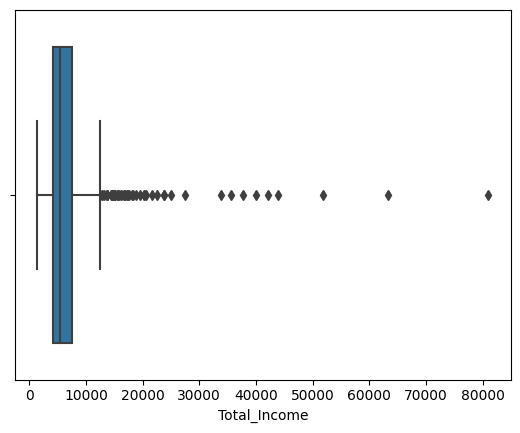

In [14]:
sns.boxplot(x=df['Total_Income'])

<AxesSubplot: xlabel='Total_Income', ylabel='Density'>

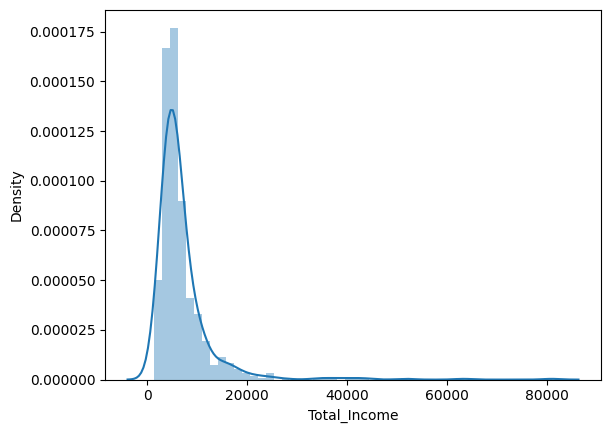

In [15]:
sns.distplot(df['Total_Income'])

# EMI

EMI stands for equated monthly instalment. It relates to payments made regularly to repay an outstanding loan within a certain time frame. As the name implies, these instalments are always of the same amount.

In [16]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']

In [17]:
df['EMI']

0      0.355556
1      0.355556
2      0.183333
3      0.333333
4      0.391667
         ...   
609    0.197222
610    0.222222
611    0.702778
612    0.519444
613    0.369444
Name: EMI, Length: 614, dtype: float64

In [18]:
skew(df['EMI'])

9.936350406533233

<AxesSubplot: xlabel='EMI', ylabel='Density'>

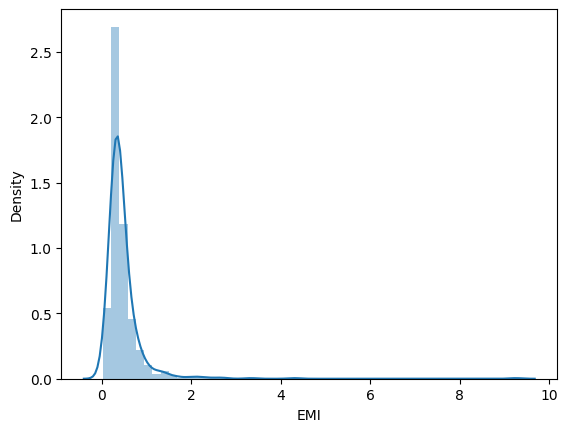

In [19]:
sns.distplot(df['EMI'])

<AxesSubplot: >

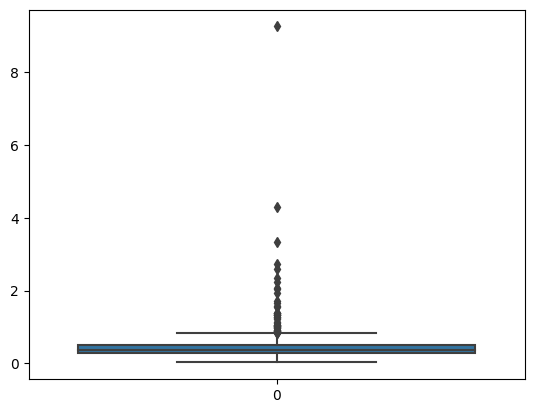

In [20]:
sns.boxplot(df['EMI'])

In [21]:
df['EMI'].describe()

count    614.000000
mean       0.473687
std        0.511134
min        0.025000
25%        0.288889
50%        0.361111
75%        0.505556
max        9.250000
Name: EMI, dtype: float64

## Balance_Income

In [22]:
df['Balance_Income']=df['Total_Income']-(df['EMI']*1000)

In [23]:
df['Balance_Income'].describe()

count      614.000000
mean      6551.017998
std       6290.136695
min      -1768.000000
25%       3804.305556
50%       4979.888889
75%       6958.027778
max      80000.000000
Name: Balance_Income, dtype: float64

<AxesSubplot: >

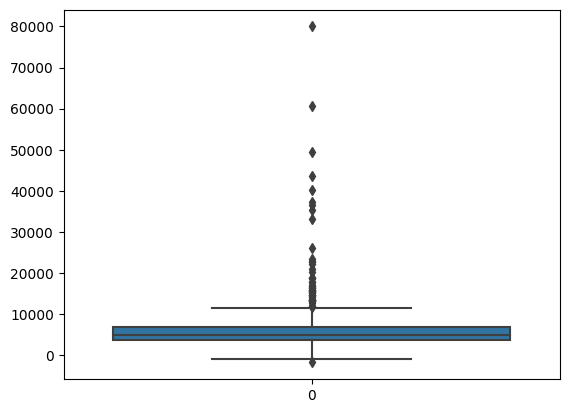

In [24]:
sns.boxplot(df['Balance_Income'])

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,4607.666667
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,5608.333333


In [26]:
df.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term'],axis=1,inplace=True)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance_Income
0,Male,No,0,Graduate,No,128.0,1.0,Urban,Y,5849.0,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,128.0,1.0,Rural,N,6091.0,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,Y,3000.0,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,Y,4941.0,0.333333,4607.666667
4,Male,No,0,Graduate,No,141.0,1.0,Urban,Y,6000.0,0.391667,5608.333333


In [28]:
X=df.drop('Loan_Status',axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Total_Income,EMI,Balance_Income
0,Male,No,0,Graduate,No,128.0,1.0,Urban,5849.0,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,128.0,1.0,Rural,6091.0,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,3000.0,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,4941.0,0.333333,4607.666667
4,Male,No,0,Graduate,No,141.0,1.0,Urban,6000.0,0.391667,5608.333333


In [29]:
y=df['Loan_Status'].map({'N':0,'Y':1})
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [30]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oe=OrdinalEncoder()

In [31]:
X[['Gender','Married','Dependents','Education','Self_Employed',"Property_Area"]]=oe.fit_transform(X[['Gender','Married','Dependents','Education','Self_Employed',"Property_Area"]])

In [32]:
X.corrwith(y)

Gender            0.017987
Married           0.091478
Dependents        0.010118
Education        -0.085884
Self_Employed    -0.003700
LoanAmount       -0.033214
Credit_History    0.540556
Property_Area     0.032112
Total_Income     -0.031271
EMI              -0.011757
Balance_Income   -0.031153
dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [35]:
#Logistice Regression Algorithm
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
logreg=LogisticRegression()
logregCV=LogisticRegressionCV(cv=10)

#K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#Support Vector
from sklearn.svm import SVC
svc=SVC()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
bnb=BernoulliNB()
gnb=GaussianNB()
mnb=MultinomialNB()

#Boosting Algorithm
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
ada=AdaBoostClassifier(base_estimator=logreg)
gba=GradientBoostingClassifier()
import xgboost as xgboost

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import roc_curve,precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import accuracy_score, make_scorer

In [37]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    
    train_Score=model.score(X_train,y_train)
    test_Score=model.score(X_test,y_test)
    ra = roc_auc_score(y_test,ypred)
    #ypredprob= model.predict_proba(X_test)[:,-1]
    #fpr , tpr , thres = roc_curve(y_test,ypredprob)
    print(f"train:-{train_Score}\ntest:- {test_Score}")
    print()
    print(f"Accuracy_Score:-{accuracy_score(ypred,y_test)}")
    #print(f"Precison Score:-{precision_score(ypred,y_test)}")
    print(f"AUC:-{ra}")
    
    #plt.plot(fpr,tpr)
    
    print("CLASSIFICATION_REPORT\n",classification_report(ypred,y_test))
    print(plot_confusion_matrix(model,X_test,y_test))
    print()
    return model

train:-0.7942973523421588
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




LogisticRegression()

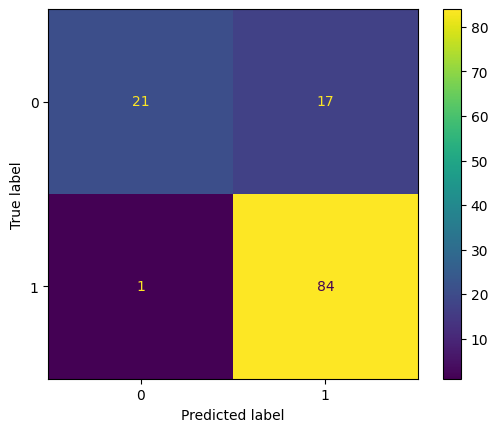

In [38]:
mymodel(logreg)

train:-0.7983706720977597
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




LogisticRegressionCV(cv=10)

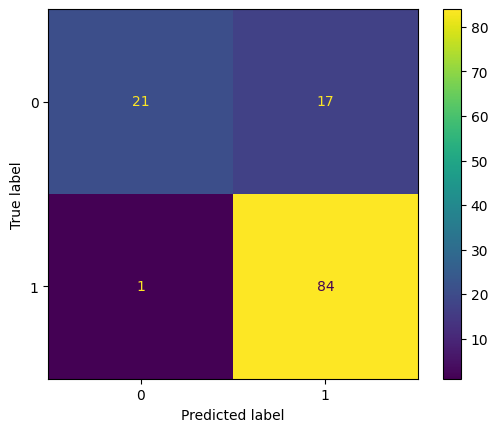

In [39]:
mymodel(logregCV)

## Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

train:-0.7983706720977597
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




LogisticRegression()

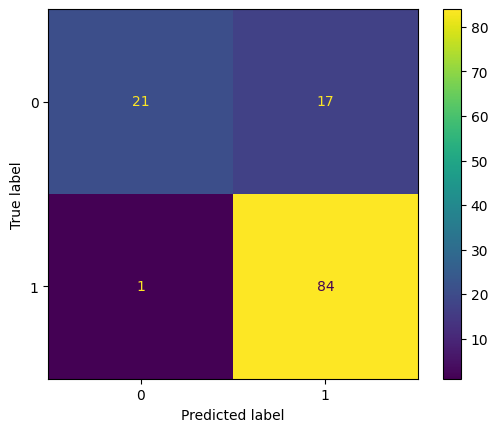

In [41]:
mymodel(logreg)

train:-0.7983706720977597
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7777089783281734
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.58      0.92      0.71        24
           1       0.98      0.84      0.90        99

    accuracy                           0.85       123
   macro avg       0.78      0.88      0.81       123
weighted avg       0.90      0.85      0.86       123




KNeighborsClassifier()

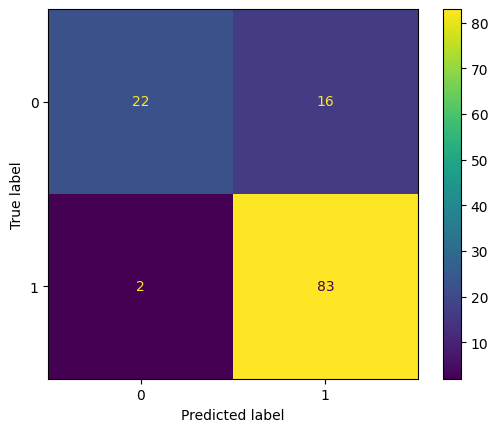

In [42]:
mymodel(knn)

train:-0.8105906313645621
test:- 0.8455284552845529

Accuracy_Score:-0.8455284552845529
AUC:-0.7572755417956657
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.53      0.95      0.68        21
           1       0.99      0.82      0.90       102

    accuracy                           0.85       123
   macro avg       0.76      0.89      0.79       123
weighted avg       0.91      0.85      0.86       123




SVC()

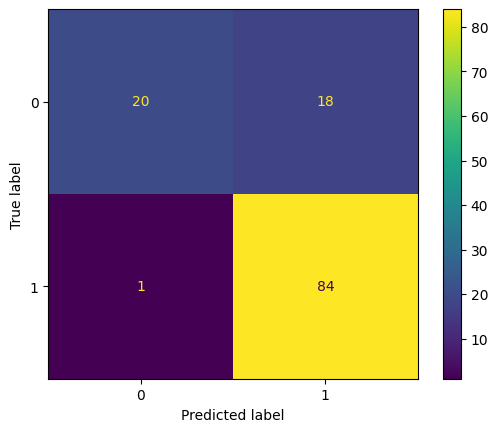

In [43]:
mymodel(svc)

train:-1.0
test:- 0.7317073170731707

Accuracy_Score:-0.7317073170731707
AUC:-0.7185758513931888
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.68      0.55      0.61        47
           1       0.75      0.84      0.80        76

    accuracy                           0.73       123
   macro avg       0.72      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123




DecisionTreeClassifier()

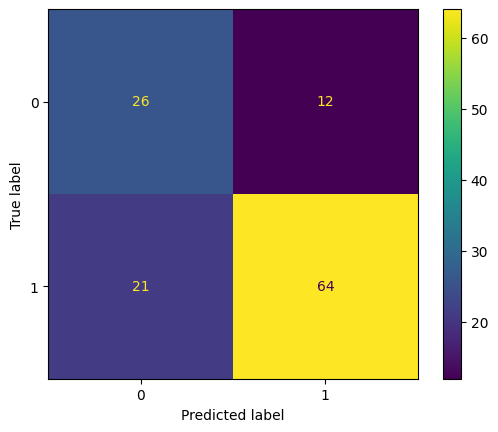

In [44]:
mymodel(dtc)

train:-0.9979633401221996
test:- 0.8455284552845529

Accuracy_Score:-0.8455284552845529
AUC:-0.7936532507739938
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.81      0.72        31
           1       0.93      0.86      0.89        92

    accuracy                           0.85       123
   macro avg       0.79      0.83      0.81       123
weighted avg       0.86      0.85      0.85       123




RandomForestClassifier()

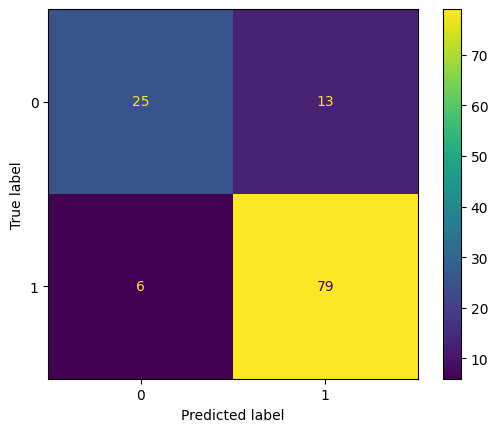

In [45]:
mymodel(rfc)

train:-0.7983706720977597
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




BernoulliNB()

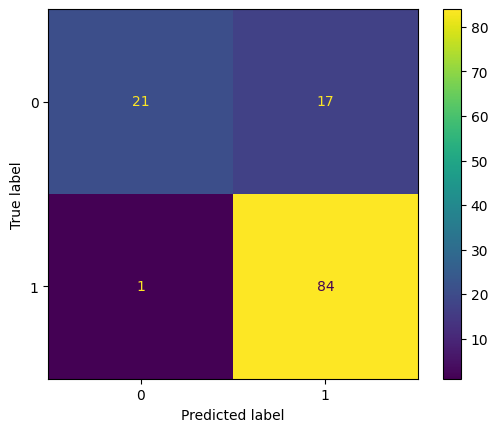

In [46]:
mymodel(bnb)

In [47]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'EMI', 'Balance_Income'],
      dtype='object')

In [48]:
columns=['Total_Income', 'EMI','Balance_Income','LoanAmount']

In [49]:
X.corrwith(y)

Gender            0.017987
Married           0.091478
Dependents        0.010118
Education        -0.085884
Self_Employed    -0.003700
LoanAmount       -0.033214
Credit_History    0.540556
Property_Area     0.032112
Total_Income     -0.031271
EMI              -0.011757
Balance_Income   -0.031153
dtype: float64

Total_Income
Skewness : 5.619676668480719


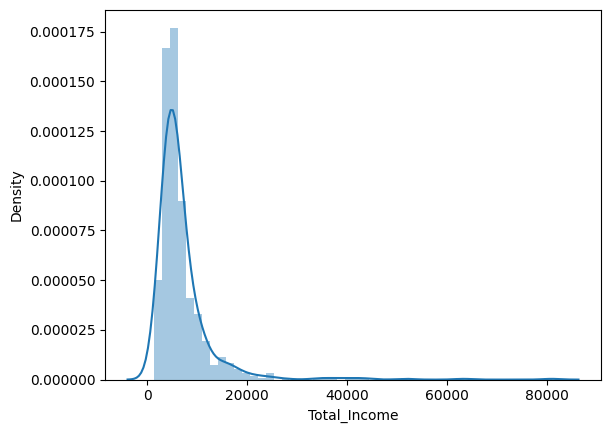

EMI
Skewness : 9.936350406533233


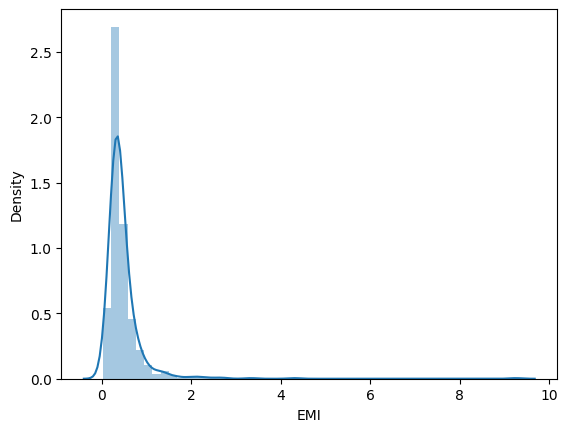

Balance_Income
Skewness : 5.6996161796853615


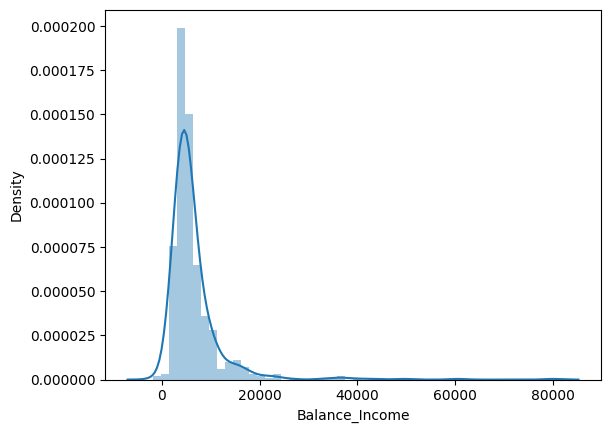

LoanAmount
Skewness : 2.736346927149759


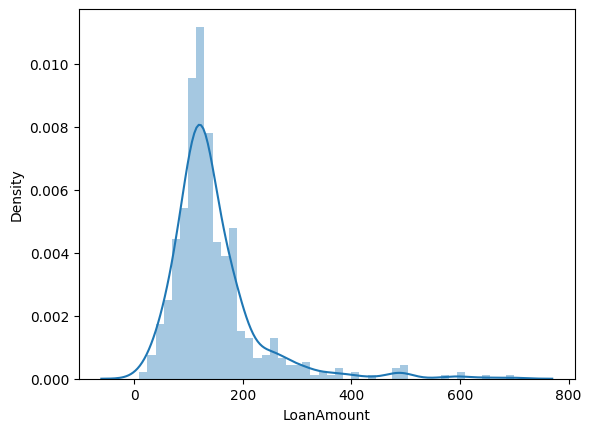

In [50]:
for col in X[columns]:
    print(col)
    print(f"Skewness : {skew(X[col])}")
    sns.distplot(X[col])
    plt.show()
    
    


## Outliers

## Total_Income

<AxesSubplot: xlabel='Total_Income'>

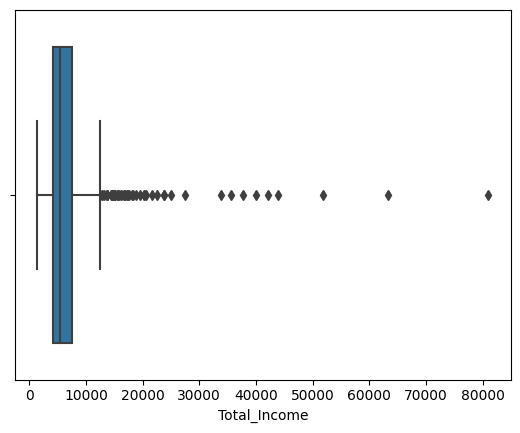

In [51]:
sns.boxplot(x=df['Total_Income'])

In [52]:
tidex=X[X['Total_Income']>30000].index

In [53]:
tidex

Int64Index([155, 171, 183, 185, 333, 409, 443, 581, 600], dtype='int64')

In [54]:
X.drop(tidex,axis=0,inplace=True)

## EMI

<AxesSubplot: >

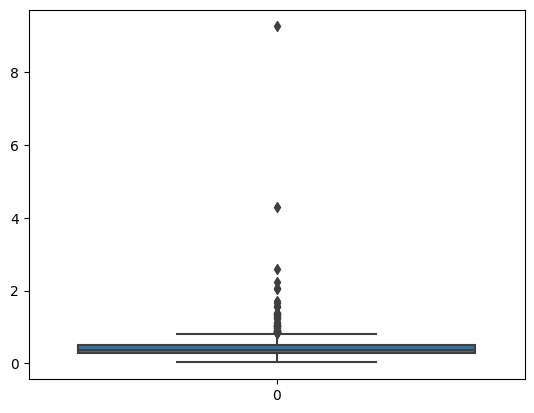

In [55]:
sns.boxplot(X['EMI'])

In [56]:
Eidex=X[X['EMI']>2].index

In [57]:
X.drop(Eidex,axis=0,inplace=True)

## Balance_Income

<AxesSubplot: >

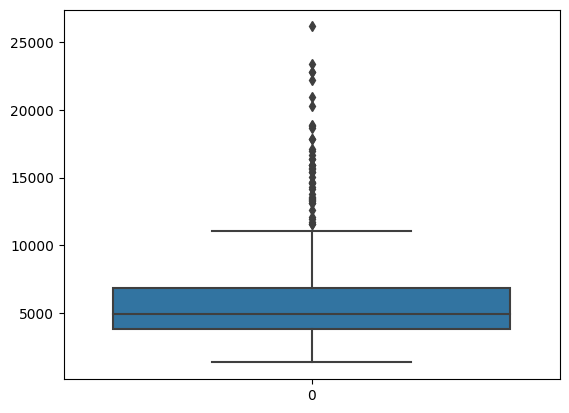

In [58]:
sns.boxplot(X['Balance_Income'])

In [59]:
bidex=X[X['Balance_Income']>15000].index

In [60]:
bidex

Int64Index([  9, 126, 130, 177, 254, 258, 284, 308, 369, 370, 372, 402, 417,
            444, 467, 475, 478, 487, 493, 506, 525, 534, 561, 572, 594],
           dtype='int64')

In [61]:
X.drop(bidex,axis=0,inplace=True)

In [62]:
X.corrwith(y)

Gender            0.024326
Married           0.092588
Dependents        0.015806
Education        -0.100557
Self_Employed    -0.036827
LoanAmount       -0.011068
Credit_History    0.563134
Property_Area     0.023206
Total_Income      0.017353
EMI               0.011584
Balance_Income    0.017216
dtype: float64

In [63]:
y.drop(tidex,axis=0,inplace=True)
y.drop(bidex,axis=0,inplace=True)
y.drop(Eidex,axis=0,inplace=True)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [83]:
X.shape

(574, 11)

In [84]:
y.shape

(574,)

In [85]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Total_Income,EMI,Balance_Income
0,1.0,0.0,0.0,0.0,0.0,128.0,1.0,2.0,5849.0,0.355556,5493.444444
1,1.0,1.0,1.0,0.0,0.0,128.0,1.0,0.0,6091.0,0.355556,5735.444444
2,1.0,1.0,0.0,0.0,1.0,66.0,1.0,2.0,3000.0,0.183333,2816.666667
3,1.0,1.0,0.0,1.0,0.0,120.0,1.0,2.0,4941.0,0.333333,4607.666667
4,1.0,0.0,0.0,0.0,0.0,141.0,1.0,2.0,6000.0,0.391667,5608.333333


In [86]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X_train= scaler1.fit_transform(X_train)
X_test= scaler1.transform(X_test)

train:-0.8191721132897604
test:- 0.8347826086956521

Accuracy_Score:-0.8347826086956521
AUC:-0.744642857142857
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.51      0.90      0.65        20
           1       0.97      0.82      0.89        95

    accuracy                           0.83       115
   macro avg       0.74      0.86      0.77       115
weighted avg       0.89      0.83      0.85       115




LogisticRegression()

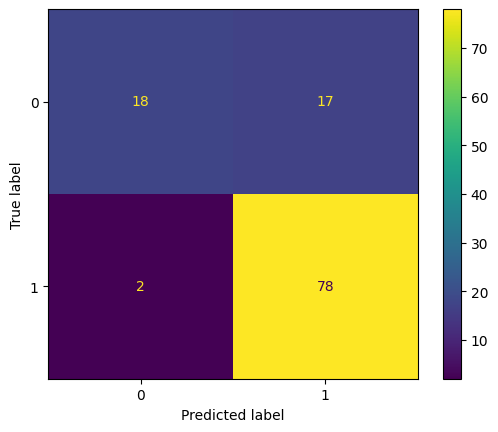

In [87]:
mymodel(logreg)

train:-0.8169934640522876
test:- 0.8347826086956521

Accuracy_Score:-0.8347826086956521
AUC:-0.744642857142857
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.51      0.90      0.65        20
           1       0.97      0.82      0.89        95

    accuracy                           0.83       115
   macro avg       0.74      0.86      0.77       115
weighted avg       0.89      0.83      0.85       115




LogisticRegressionCV(cv=10)

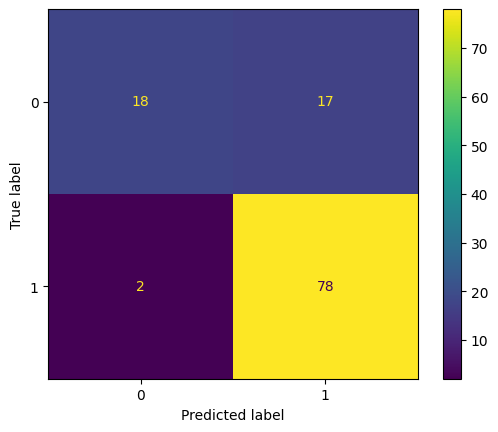

In [88]:
mymodel(logregCV)

train:-1.0
test:- 0.8173913043478261

Accuracy_Score:-0.8173913043478261
AUC:-0.7401785714285715
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.54      0.79      0.64        24
           1       0.94      0.82      0.88        91

    accuracy                           0.82       115
   macro avg       0.74      0.81      0.76       115
weighted avg       0.86      0.82      0.83       115




RandomForestClassifier()

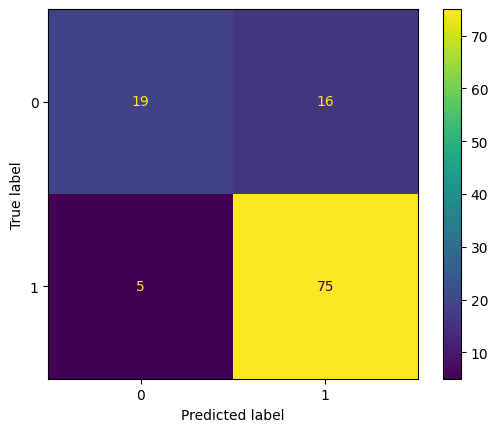

In [89]:
mymodel(rfc)